1.   52000734 - Nguyễn Dương Bình An
2.   52000761 - Bùi Tuấn Hưng
1.   51800839 - Lưu Trần Ngọc Anh






#**Bài 2**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

#Truyền dữ liệu đầu vào

In [ ]:
filename = 'Real estate valuation data set.xlsx'
xl = pd.ExcelFile(filename)
sheet_names = xl.sheet_names
df = xl.parse(sheet_names[0])
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


#Đồ thị minh họa Correlation Matrix

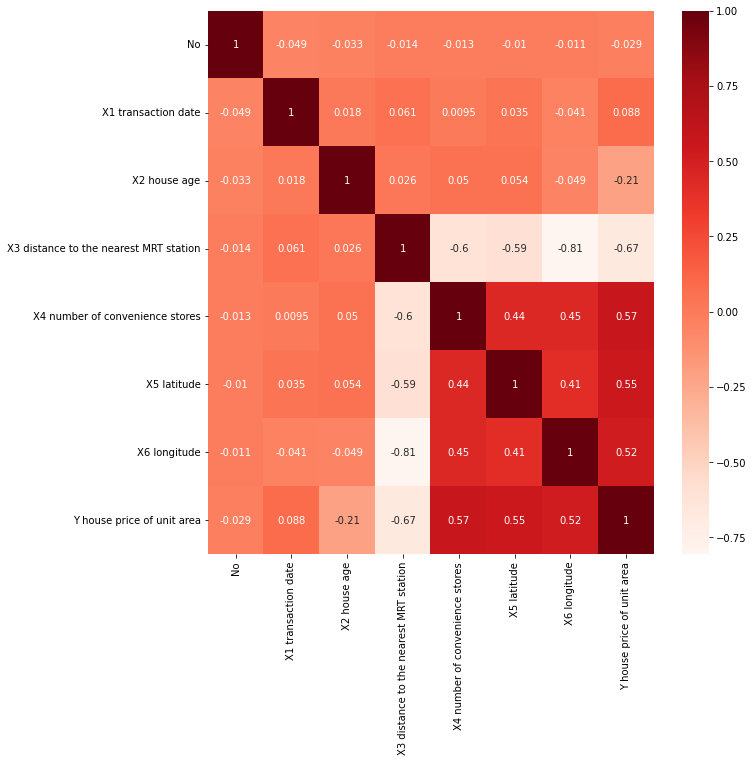

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize = (10,10))
sn.heatmap(corrMatrix, annot=True, cmap = plt.cm.Reds)
plt.show()

#Khởi tạo hàm Feature Selection theo Pearson's Correlation

In [ ]:
from scipy.stats import pearsonr
def pearson_correlation(X, y, threshold):
    col_corr = set()
    for i in X.columns:
      corr, _ = pearsonr(X[i], y)
      if abs(corr) > threshold:
        col_corr.add(i)
    return col_corr

#Sử dụng hàm với threshold = 0.5

In [ ]:
X = df.drop('Y house price of unit area', axis = 1)
y = df['Y house price of unit area']
names = df.columns
corrFeatures = pearson_correlation(X, y, 0.5)
corrFeatures

{'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude'}

In [ ]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
df = pd.DataFrame(scaler.fit_transform(df.values), columns = names)
X = df.drop('Y house price of unit area', axis = 1)
y = df['Y house price of unit area']

#Chia dữ liệu để train và test

In [ ]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
X_train

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
175,0.084638,0.968088,0.014523,0.227068,0.001443,0.012008,0.058447
10,0.005345,0.978200,0.016910,0.196902,0.000486,0.012135,0.059056
76,0.036467,0.953626,0.017002,0.291925,0.001421,0.011829,0.057560
172,0.085319,0.993043,0.003255,0.044610,0.004439,0.012317,0.059942
34,0.017257,0.992420,0.007593,0.101260,0.003451,0.012319,0.059929
...,...,...,...,...,...,...,...
369,0.123479,0.671679,0.006741,0.729234,0.001001,0.008331,0.040552
320,0.068770,0.431204,0.002892,0.899224,0.000000,0.005343,0.026031
15,0.007619,0.958905,0.017001,0.275830,0.000952,0.011897,0.057883
125,0.062046,0.991337,0.000542,0.095326,0.002955,0.012294,0.059850


#Original Model

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred_1 = model1.predict(X_test)

#Pearson's Correlation Model

In [ ]:
X_train = X_train.drop(corrFeatures, axis = 1)
X_test = X_test.drop(corrFeatures,axis=1)

In [ ]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred_2 = model2.predict(X_test)

#So sánh MAE giữa Original Model và Pearson's Correlation Model

In [ ]:
from sklearn.metrics import mean_absolute_error
error_model1 = mean_absolute_error(y_test,y_pred_1)
error_model2 = mean_absolute_error(y_test,y_pred_2)
print("MAE of Original Model: ", error_model1)
print("MAE of Pearson's Correlation Model: ", error_model2)

MAE of Original Model:  0.002445298004312415
MAE of Pearson's Correlation Model:  0.0034501294115035584
